In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [86]:
## the files 0, 1, 2, 3 are for the long time case.
times = []
diffs = []
diffs2 = []

name = "Time-2022-12-21-0003.txt"

data = open("data/2022-12-21/"+name, "r")

ii = 0
count = []

for row in data:
    ii += 1
    row = row.replace("\n", "")
    row = row.replace(",", ".")
    terms = row.split("\t")
    terms = np.sort([float(terms[term]) for term in range(len(terms))])
    count_ = 0
    for i in range(len(terms)):
        if terms[i]<7.5:
            terms[i] = 0
        elif terms[i]>9:
            terms[i] = 0
        else:
            count_ += 1
    count.append(count_)

    diffs = diffs + [terms[i+1] - terms[i] for i in range(len(terms)-1)]
    for term in terms:
        
        if float(term) > 1:
            #print(float(term))
            times.append(float(term))

for _ in range(ii):
    times_aus = np.random.choice(times, int(len(times)/ii), replace=False)
    times_aus = np.sort(times_aus)
    diffs2 = diffs2 + [float(times_aus[i+1]) - float(times_aus[i]) for i in range(len(times_aus)-1)]

In [87]:
np.mean(count)

13.58

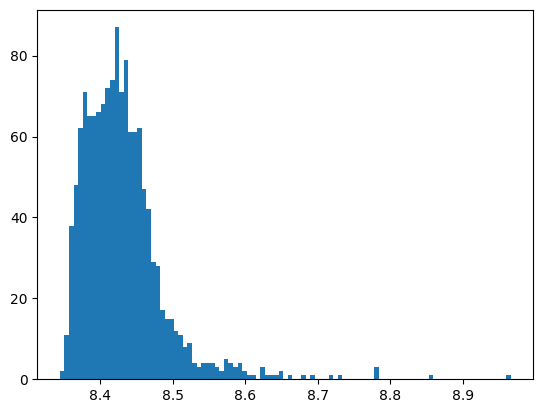

In [64]:
plt.hist(times, bins=np.linspace(min(times), max(times), 100))
plt.show()

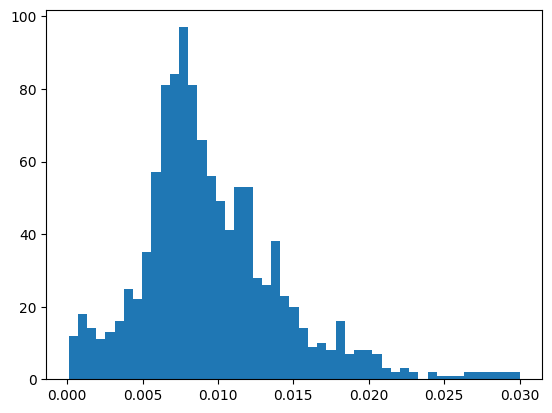

In [108]:
plt.hist(diffs, bins=np.linspace(0.0001, 0.03, 50))
plt.show()

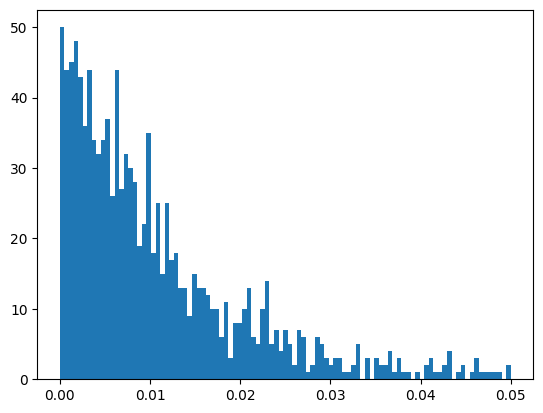

In [39]:
plt.hist(diffs2, bins=np.linspace(0, 0.05, 100))
plt.show()

# numerical experiment

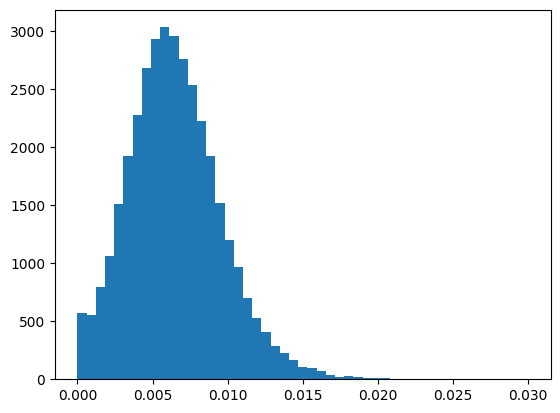

In [118]:
t_range = 13.4 # how many ions arrived in one experiment
reps = 10000
death_time = 0.006 # bethween 0 and 1
diffs3 = []
range_ = 0.03 

for _ in range(reps):

    t_range_ = np.random.poisson(t_range)
    t_i = np.sort(np.random.random(t_range_)*range_)
    t_lim = t_i[0]
    for j in range(t_range_):
        if t_i[j] - t_lim > death_time+(np.random.normal()*range_)/10: # random death time
            diffs3 = diffs3 + [t_i[j] - t_lim]
            t_lim = t_i[j]
            
plt.hist(diffs3, bins=np.linspace(0,range_,50))
plt.show()